In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.misc import imresize
import json
import flickrapi as fl

import os, glob

from imageio import imsave

from PIL import Image
import requests
from io import BytesIO

from IPython.display import clear_output

import ipywidgets as widgets

api_key = "0f1d2e9e584fa7bc3f1eab726a91464a"
api_secret = "f75c6c2cd4ae0422"

flickr = fl.FlickrAPI(api_key, api_secret)

flickr_dataset_path = "../flickr_dataset/"

In [2]:
#flickr.photos.licenses.getInfo(format='parsed-json')

In [3]:
req_extras = ["owner_name", 
              "tags", 
              "o_dims",
              "url_c", 
              "url_o"]

license_ids = ['2', '3', '4', '5', '6', '7', '9', '10']
license_ids = ','.join(license_ids)


req_extras = ', '.join(req_extras)

res = flickr.photos.search(text="people",
                           license=license_ids,
                           content_type='1', # Only photos
                           media='photos',
                           extras=req_extras,
                           format="parsed-json")

photos = res['photos']['photo']
num_photos = len(photos)

Button(description='Accept!', style=ButtonStyle())

Button(description='Decline!', style=ButtonStyle())

Saving ../flickr_dataset//66_65535_48013941017_8f785623b8.png!
98 / 100 photos left!
4 photos in dataset!
Title: Rosary at The Grotto 2019
Dims: 4608x3456
RGB


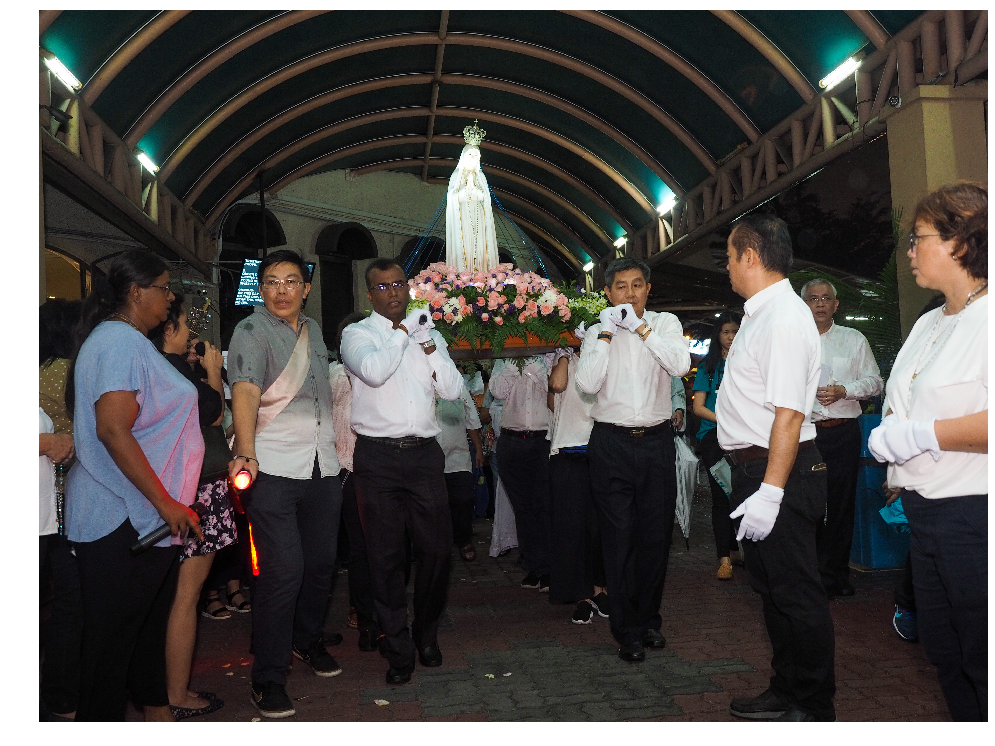

In [4]:
if not os.path.exists(flickr_dataset_path):
    print("Creating Dataset Folder!")
    os.mkdir(flickr_dataset_path)

search_text = widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='Search Text:',
    disabled=False
)

accept_button = widgets.Button(description="Accept!")
decline_button = widgets.Button(description="Decline!")

img = None
photo = None

def examine_next_image(b, accepted):
    
    global img, photo
        
    clear_output()
    display(accept_button)
    display(decline_button)
    
    # if accepted, downsample the last image save it as png
    if accepted:
        
        # Can reconstruct image id from
        # http://farm{farm-id}.static.flickr.com/{server-id}/{id}_{secret}.(jpg|gif|png)
        file_name = "{}/{}_{}_{}_{}.png".format(flickr_dataset_path,
                                                photo['farm'],
                                                photo['server'],
                                                photo['id'],
                                                photo['secret'])
        
        if os.path.exists(file_name):
            print("{} already exists!".format(file_name))
        
        else:
            print("Saving {}!".format(file_name))
            w, h = img.size
            
            # Downsample by 2
            resized = np.array(img.resize((w // 2, h // 2)))

            imsave(file_name, resized)
    
    # Get the next photo
    if len(photos) == 0:
        print("No more photos left in response!")
        return
    
    else:
        print("{} / {} photos left!".format(len(photos), num_photos))
    
    photo = photos.pop()
    
    while 'url_o' not in photo or "title" not in photo:
        photo = photos.pop()
    
    print("{} photos in dataset!".format(len(glob.glob(flickr_dataset_path + "/*.png"))))
    print("Title: {}\nDims: {}x{}".format(photo["title"], photo["width_o"], photo["height_o"]))
    
    response = requests.get(photo['url_o'])
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(17, 17))
    plt.axis('off')
    plt.imshow(np.asarray(img))
    
    print(img.mode)
    
examine_next_image(None, False)

accept_button.on_click(lambda b: examine_next_image(b, True))
decline_button.on_click(lambda b: examine_next_image(b, False))